#Business Analytics & Logistical Regression

##Case study - Titanic survivors

####Name: Carlos Munoz

####Perform data analysis on predicting how many survivors made it through when the titanic sunk.



In [13]:
%cd /content/drive/MyDrive/Business Analyst/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst/Statistics and Descriptive Analytics/Logistic Regression


In [67]:
#libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [15]:
#Load the data
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#Remove Outliers

In [16]:
#Drop name variable
df = df.drop(columns = "Name")
df.head(1)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.25


#Analyze the data

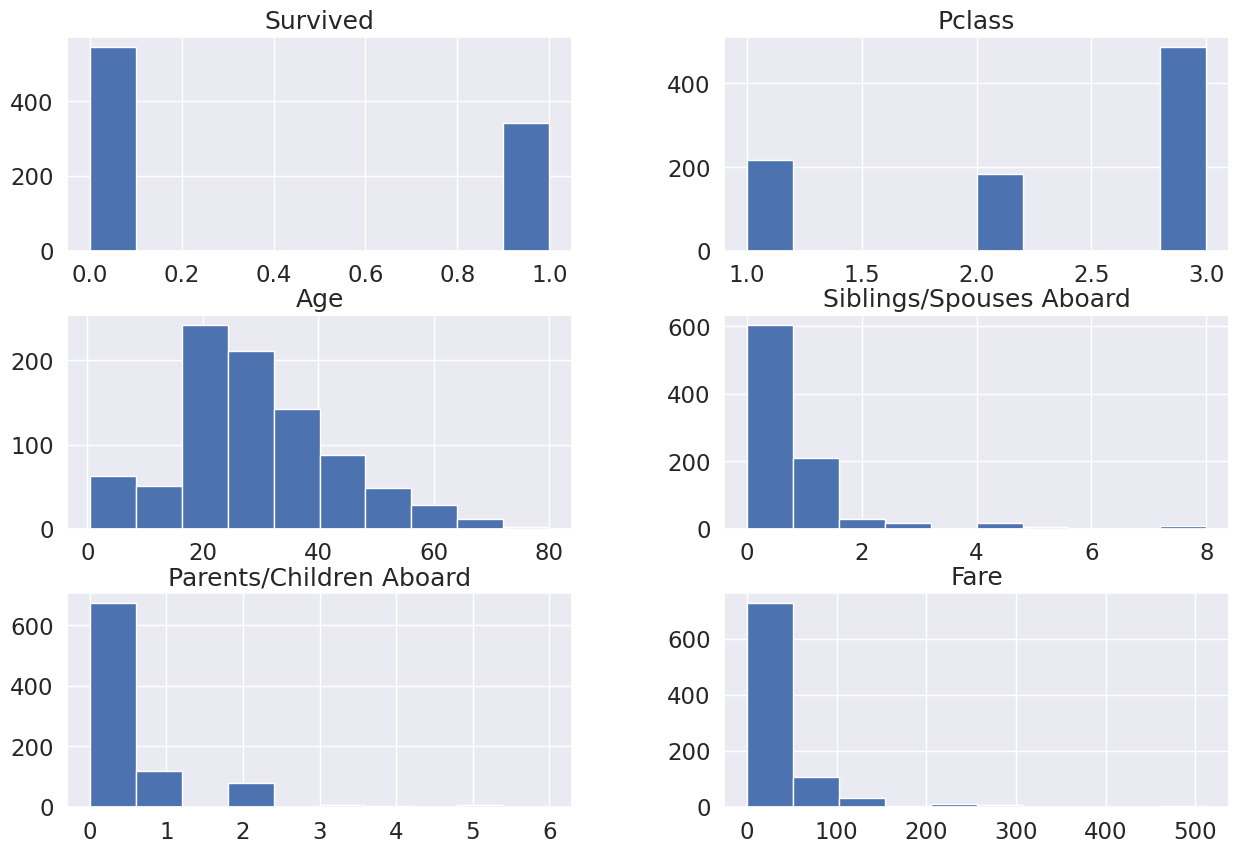

In [17]:
#Histogram

df.hist(figsize=(15, 10))
plt.show()

In [18]:
#Summary Statistics
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [19]:
#Transform character variables
df = pd.get_dummies(data = df, drop_first=True)

<Axes: >

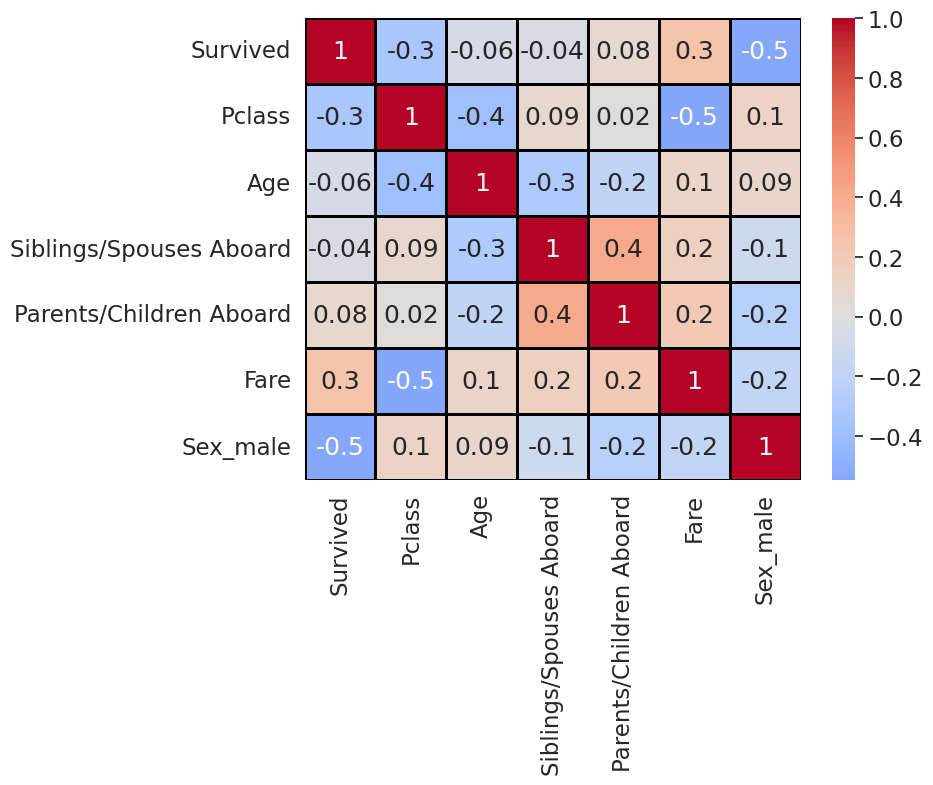

In [20]:
#Correlation matrix
plt.figure(figsize = (8,6))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

#Logistic Regression preparation

In [69]:
df.head(0)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male


In [70]:
#Prepare X and Y
y = df.Survived
X = df.drop(columns = "Survived")
X = sm.add_constant(X)

In [71]:
#Training and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

#Logistic regression and Assessment


In [74]:
#Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:4]

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))